# Web Scraping using Selenium and BeautifulSoup
## Domain Realestate
### https://www.domain.com.au/

# Code

In [935]:
#imports for scraping
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup

#imports for data handling
import re
import pandas as pd
import numpy as np

#imports for visualizing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Open the web browser for scraping

In [1022]:
options = webdriver.ChromeOptions()
options.add_experimental_option('excludeSwitches', ['enable-automation']) 
driver = webdriver.Chrome('/Users/Hasitha/Documents/GitHub/web-scraping-python/src/chromedriver',options=options)
driver.implicitly_wait(20)

In [1023]:
url = 'https://www.domain.com.au/sold-listings/narre-warren-vic-3805/?ptype=apartment-unit-flat,block-of-units,duplex,free-standing,new-apartments,new-home-designs,new-house-land,pent-house,semi-detached,studio,terrace,town-house,villa&excludepricewithheld=1'
driver.get(url)

In [1036]:
first_page = False
clear_data_lists()

In [1037]:
df.drop(df.index, inplace=True)

In [1050]:
soup = BeautifulSoup(driver.page_source, 'lxml')
scrape_web_page(soup)

https://www.domain.com.au/sold-listings/narre-warren-vic-3805/?ptype=apartment-unit-flat,block-of-units,duplex,free-standing,new-apartments,new-home-designs,new-house-land,pent-house,semi-detached,studio,terrace,town-house,villa&excludepricewithheld=1&page=5
price list:  20
date list:  20
14 Greenacre Crescent, 
NARRE WARREN VIC 3805
18A Bluegum Court, 
NARRE WARREN VIC 3805
32 Sandalwood  Drive, 
NARRE WARREN VIC 3805
133 Fleetwood Drive, 
NARRE WARREN VIC 3805
19/302 Golf Links Road, 
NARRE WARREN VIC 3805
23/302 Golf Links Road, 
NARRE WARREN VIC 3805
6 Houlden Court, 
NARRE WARREN VIC 3805
14 Aberdeen Court, 
NARRE WARREN VIC 3805
12/6-8 Sylvanwood Cres, 
NARRE WARREN VIC 3805
8 Portsea Place, 
NARRE WARREN VIC 3805
11 Winnie Court, 
NARRE WARREN VIC 3805
24 Emily  Drive, 
NARRE WARREN VIC 3805
23 Ellenvale Drive, 
NARRE WARREN VIC 3805
7 Springwood Avenue, 
NARRE WARREN VIC 3805
NARRE WARREN VIC 3805
57 Jacksons Road, 
NARRE WARREN VIC 3805
2 Fairview Avenue, 
NARRE WARREN VIC 380

In [1039]:
df = create_dataframe()

df.drop(df.index, inplace=True)

In [1044]:
address

[]

In [1040]:
df

,address,property_type,date,beds,baths,parking,area,price
0,14 Greenacre Crescent,House,14-Dec-2019,4,2,2,650,670000
1,18A Bluegum Court,House,14-Dec-2019,3,2,2,0,545000
2,32 Sandalwood Drive,House,13-Dec-2019,3,2,2,600,615000
3,133 Fleetwood Drive,House,13-Dec-2019,4,2,3,666,700000
4,19/302 Golf Links Road,Apartment / Unit / Flat,10-Dec-2019,3,2,1,0,405000
5,23/302 Golf Links Road,Apartment / Unit / Flat,10-Dec-2019,3,1,1,0,403000
6,6 Houlden Court,House,09-Dec-2019,5,2,2,723,780000
7,14 Aberdeen Court,House,09-Dec-2019,5,3,1,690,760000
8,12/6-8 Sylvanwood Cres,Townhouse,08-Dec-2019,3,2,1,0,565000
9,8 Portsea Place,House,06-Dec-2019,4,2,1,0,677000


# Navigating thorough the website

In [1033]:
soup = []

for x in range(5):
    
    if first_page == False:
        next_button = driver.find_element_by_xpath('/html/body/div[2]/div/div/div[3]/div[2]/div[1]/div[3]/div[1]/div/a')
        next_button.click()
        driver.implicitly_wait(20)
        first_page = True
        #print(driver.current_url)
        
        soup = BeautifulSoup(driver.page_source, 'lxml')
        
        scrape_web_page(soup)
        
        df = concat_dataframe(df,create_dataframe())
        
    else:
        try:
            next_button = driver.find_element_by_xpath('/html/body/div[2]/div/div/div[3]/div[2]/div[1]/div[3]/div[1]/div/a[2]')
            next_button.click()
            driver.implicitly_wait(20)
            #print(driver.current_url)
            
            soup = BeautifulSoup(driver.page_source, 'lxml')
            
            scrape_web_page(soup)
            
            df = concat_dataframe(df,create_dataframe())
            
        except NoSuchElementException: 
            print('All pages reached!')
            driver.close()
            break

https://www.domain.com.au/sold-listings/narre-warren-vic-3805/?ptype=apartment-unit-flat,block-of-units,duplex,free-standing,new-apartments,new-home-designs,new-house-land,pent-house,semi-detached,studio,terrace,town-house,villa&excludepricewithheld=1&page=4
price list:  20
date list:  20
address list:  20
property type list:  20

details list: 71
beds: 20 
baths: 20 
parking: 20 
area: 20
https://www.domain.com.au/sold-listings/narre-warren-vic-3805/?ptype=apartment-unit-flat,block-of-units,duplex,free-standing,new-apartments,new-home-designs,new-house-land,pent-house,semi-detached,studio,terrace,town-house,villa&excludepricewithheld=1&page=5
price list:  20
date list:  20
address list:  20
property type list:  20

details list: 73
beds: 20 
baths: 20 
parking: 20 
area: 20
https://www.domain.com.au/sold-listings/narre-warren-vic-3805/?ptype=apartment-unit-flat,block-of-units,duplex,free-standing,new-apartments,new-home-designs,new-house-land,pent-house,semi-detached,studio,terrace,to

ValueError: arrays must all be same length

In [1035]:
df.tail(10)

,address,property_type,date,beds,baths,parking,area,price
70,11 Winnie Court,House,04-Dec-2019,3,2,8,0,643000
71,24 Emily Drive,House,03-Dec-2019,3,1,1,0,465000
72,23 Ellenvale Drive,House,02-Dec-2019,4,2,2,650,653000
73,7 Springwood Avenue,House,Nov-2019,3,1,1,737,585000
74,NARRE WARREN VIC 380,House,29-Nov-2019,3,2,0,"1,109",750000
75,NARRE WARREN VIC 380,House,27-Nov-2019,3,2,4,605,580000
76,NARRE WARREN VIC 380,House,26-Nov-2019,4,2,2,595,750000
77,NARRE WARREN VIC 380,House,26-Nov-2019,3,2,3,722,590000
78,NARRE WARREN VIC 380,House,26-Nov-2019,4,2,3,720,655000
79,NARRE WARREN VIC 380,House,26-Nov-2019,3,2,2,620,590000


## Data extracting functions

In [1049]:
def scrape_price(soup):
    
    price_list.clear()
    price = soup.find_all('p', attrs = {'class':'css-mgq8yx'})
    
    for row in price:
        price_list.append(row.getText().split()[0].strip()[1:].replace(',',''))
        
    print('price list: ',len(price_list))
    
def scrape_date(soup):
    
    date_list.clear()
    date = soup.find_all('span', attrs={'class': 'css-1nj9ymt'})
    
    for row in date:
        date_list.append('-'.join(row.getText().split()[4:]))
        
    print('date list: ',len(date_list))
        
def scrape_address(soup):
    
    address_list.clear()
    address = soup.find_all('span', attrs={'class':'css-1fclaxo'})
    
    count = 0
    for row in address:
        #print(row.getText())
        if (int(count)%2)== 0:
            address_list.append(row.getText().strip()[:-1])
        count = count+1
       
    print('address list: ',len(address_list))
    
def scrape_property_type(soup):
    
    property_type_list.clear()
    property_type = soup.find_all('span', attrs={'class': 'css-693528'})
    
    for row in property_type:
        property_type_list.append(row.getText().strip())
        
    print('property type list: ',len(property_type_list))
    
def scrape_details(soup):
    
    details_list.clear()
    beds.clear()
    baths.clear()
    parking.clear()
    area.clear()
    
    details = soup.find_all('span', attrs={'class': 'css-1rzse3v'})
    
    for row in details:
        details_list.append(row.getText().strip().split())
        
    print('\ndetails list:', len(details_list))
    status = False

    for item in details_list:

        if len(item) == 2:

            if item[1] == 'Beds' and status == True:
                area.append('0')
                status = False
            if item[1] == 'Beds':
                beds.append(item[0])
            elif item[1] == 'Bath' or item[1] == 'Baths':
                baths.append(item[0])
            elif item[1] == 'Parking':
                status = True
                if item[0].isdigit():
                    parking.append(item[0])
                else:
                    parking.append('0')
                    
        elif len(item)==1: 
            
            area.append(item[0][:-2])
            status = False
    
    if len(area) < len(beds):
        area.append('0')
    
    print('beds:',len(beds),'\nbaths:',len(baths),'\nparking:',len(parking),'\narea:',len(area))
            
def scrape_web_page(soup):
    print(driver.current_url)
    scrape_price(soup)
    scrape_date(soup)
    scrape_address(soup)
    scrape_property_type(soup)
    scrape_details(soup)
    
def clear_data_lists():
    price_list.clear()
    date_list.clear()
    address_list.clear()
    property_type_list.clear()
    details_list.clear()
    beds.clear()
    baths.clear()
    parking.clear()
    area.clear()

    price.clear()
    date.clear()
    address.clear()
    property_type.clear()
    details.clear()
    


## Dataframe functions

In [1032]:
def create_dataframe():
    
    df = pd.DataFrame({'address':address_list,'property_type':property_type_list,
                       'date':date_list,'beds':beds,'baths':baths,'parking':parking,
                       'area':area,'price':price_list})
    
    return df
    
def concat_dataframe(df1,df2):
    
    return pd.concat([df1,df2],ignore_index=True)
    
def convert_columns_to_integer(df):
    
    df[['beds', 'baths','parking','area','price']] = df[['beds', 'baths','parking','area','price']].apply(pd.to_numeric)
    

In [633]:
#def scrape_details():
    
#soup = BeautifulSoup(driver.page_source, 'lxml')

price = soup.find_all('p', attrs = {'class':'css-mgq8yx'})
date = soup.find_all('span', attrs={'class': 'css-1nj9ymt'})
address = soup.find_all('span', attrs={'class':'css-1fclaxo'})
property_type = soup.find_all('span', attrs={'class': 'css-693528'})
details = soup.find_all('span', attrs={'class': 'css-1rzse3v'})

#all_properties = soup.find_all('li', attrs={'class': 'css-1b4kfhp'})

In [1095]:
soup = BeautifulSoup(driver.page_source, 'lxml')

address_list.clear()
address = soup.find_all('span', attrs={'class':'css-1fclaxo'})

for row in address:
    address_list.append(row.getText().strip())
    print(row.getText())
print(address_list)

si = iter(address_list)
[c+next(si, '') for c in si]

14 Greenacre Crescent, 
NARRE WARREN VIC 3805
18A Bluegum Court, 
NARRE WARREN VIC 3805
32 Sandalwood  Drive, 
NARRE WARREN VIC 3805
133 Fleetwood Drive, 
NARRE WARREN VIC 3805
19/302 Golf Links Road, 
NARRE WARREN VIC 3805
23/302 Golf Links Road, 
NARRE WARREN VIC 3805
6 Houlden Court, 
NARRE WARREN VIC 3805
14 Aberdeen Court, 
NARRE WARREN VIC 3805
12/6-8 Sylvanwood Cres, 
NARRE WARREN VIC 3805
8 Portsea Place, 
NARRE WARREN VIC 3805
11 Winnie Court, 
NARRE WARREN VIC 3805
24 Emily  Drive, 
NARRE WARREN VIC 3805
23 Ellenvale Drive, 
NARRE WARREN VIC 3805
7 Springwood Avenue, 
NARRE WARREN VIC 3805
NARRE WARREN VIC 3805
57 Jacksons Road, 
NARRE WARREN VIC 3805
2 Fairview Avenue, 
NARRE WARREN VIC 3805
15 Pemberton Drive, 
NARRE WARREN VIC 3805
4 Charing Cross Place, 
NARRE WARREN VIC 3805
3 Garryowen Crescent, 
NARRE WARREN VIC 3805
['14 Greenacre Crescent,', 'NARRE WARREN VIC 3805', '18A Bluegum Court,', 'NARRE WARREN VIC 3805', '32 Sandalwood  Drive,', 'NARRE WARREN VIC 3805', '133 

['14 Greenacre Crescent,NARRE WARREN VIC 3805',
 '18A Bluegum Court,NARRE WARREN VIC 3805',
 '32 Sandalwood  Drive,NARRE WARREN VIC 3805',
 '133 Fleetwood Drive,NARRE WARREN VIC 3805',
 '19/302 Golf Links Road,NARRE WARREN VIC 3805',
 '23/302 Golf Links Road,NARRE WARREN VIC 3805',
 '6 Houlden Court,NARRE WARREN VIC 3805',
 '14 Aberdeen Court,NARRE WARREN VIC 3805',
 '12/6-8 Sylvanwood Cres,NARRE WARREN VIC 3805',
 '8 Portsea Place,NARRE WARREN VIC 3805',
 '11 Winnie Court,NARRE WARREN VIC 3805',
 '24 Emily  Drive,NARRE WARREN VIC 3805',
 '23 Ellenvale Drive,NARRE WARREN VIC 3805',
 '7 Springwood Avenue,NARRE WARREN VIC 3805',
 'NARRE WARREN VIC 380557 Jacksons Road,',
 'NARRE WARREN VIC 38052 Fairview Avenue,',
 'NARRE WARREN VIC 380515 Pemberton Drive,',
 'NARRE WARREN VIC 38054 Charing Cross Place,',
 'NARRE WARREN VIC 38053 Garryowen Crescent,',
 'NARRE WARREN VIC 3805']

In [337]:
price_list = []

for row in price:
    price_list.append(row.getText().strip()[1:].replace(',',''))

In [173]:
date_list = []

for row in date:
    date_list.append('-'.join(row.getText().split()[4:]))

In [399]:
address_list = []
count = 0
for row in address:
    if (int(count)%2)== 0:
        address_list.append(row.getText().strip()[:-1])
    count = count+1

In [361]:
property_type_list=[]

for row in property_type:
    
    property_type_list.append(row.getText().strip())

In [634]:
details_list=[]
beds = []
baths = []
parking = []
area = []

for row in details:
    #print (row.getText().split())
    details_list.append(row.getText().strip().split())

    
status = False

for item in details_list:
    
    if len(item) == 2:
        
        if item[1] == 'Beds' and status == True:
            area.append('0')
            status = False
        if item[1] == 'Beds':
            beds.append(item[0])
        elif item[1] == 'Bath' or item[1] == 'Baths':
            baths.append(item[0])
        elif item[1] == 'Parking':
            status = True
            if item[0].isdigit():
                parking.append(item[0])
            else:
                parking.append('0')
    elif len(item)==1: 
    
        area.append(item[0][:-2])
        status = False
    

In [638]:
len(baths)

20

In [819]:
df = pd.DataFrame({'address':address_list,'property_type':property_type_list,'date':date_list,'beds':beds,'baths':baths,
        'parking':parking,'area':area,'price':price_list})

In [ ]:
df[['beds', 'baths','parking','area','price']] = df[['beds', 'baths','parking','area','price']].apply(pd.to_numeric)

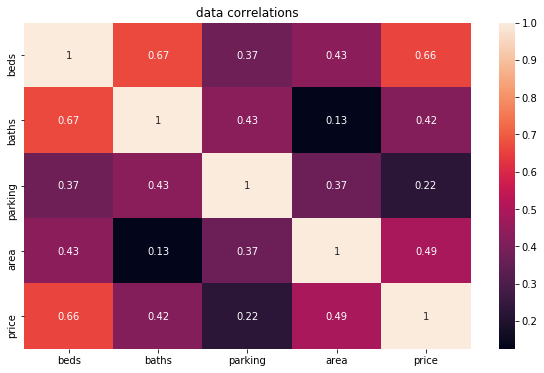

In [374]:
plt.figure(figsize=(10,6))
plt.title('data correlations')
sns.heatmap(df.corr(), annot=True)

In [327]:
df.dtypes

address    object
price      object
date       object
beds        int64
baths       int64
parking     int64
area        int64
dtype: object

from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())